In [97]:
#Maichoua Xiong
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

application = pd.read_csv(r'C:\Users\CHEELACHONE\Documents\datasets\application_record.csv') 
application.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


perform initial exploratory tasks:
1. Display representative portions of the data.
2. Check for missing values and clean the data.
3. Check for outliers and decide if and how to process them.

Using exploratory analysis to analyze and clean the dataset, and creating appropriate graphs to entail insights on the variables and determine how useful it is in determining loan approval in a financial institute. This will also be pertinent to determine how the variables can be used in regards to determining what the model will predict. 

Displaying representative portions of the data, using seaborns catplot to plot the different categories in the dataset. Using count as the y-axis which counts how many times that category appears within the dataset.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18')])

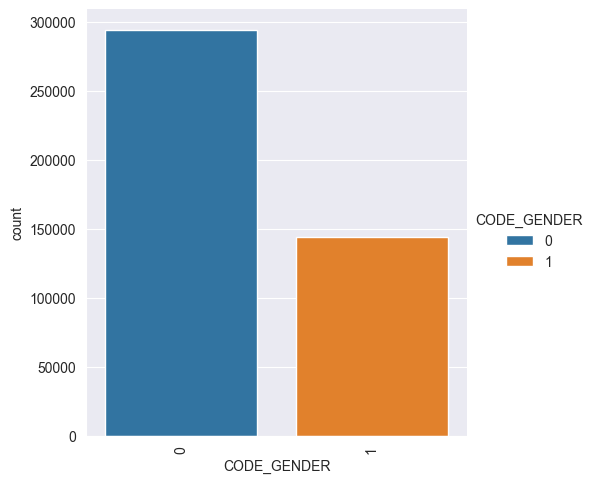

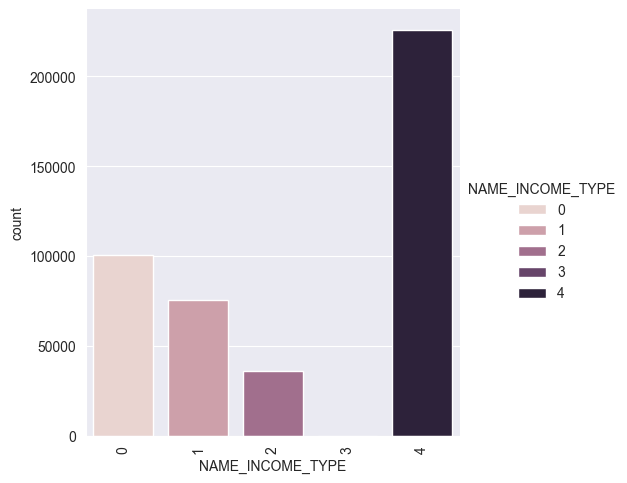

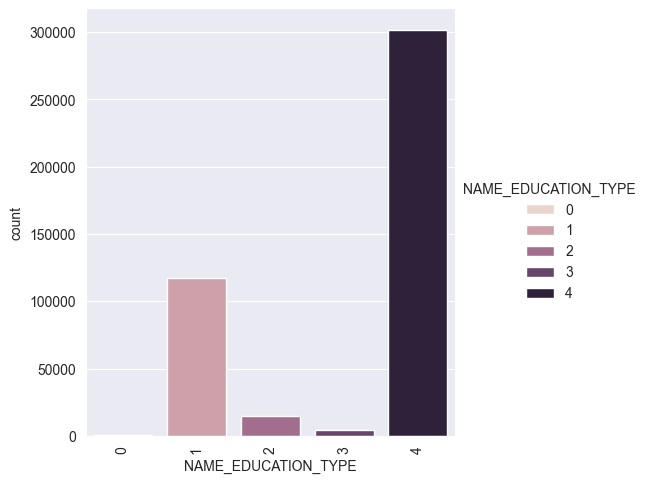

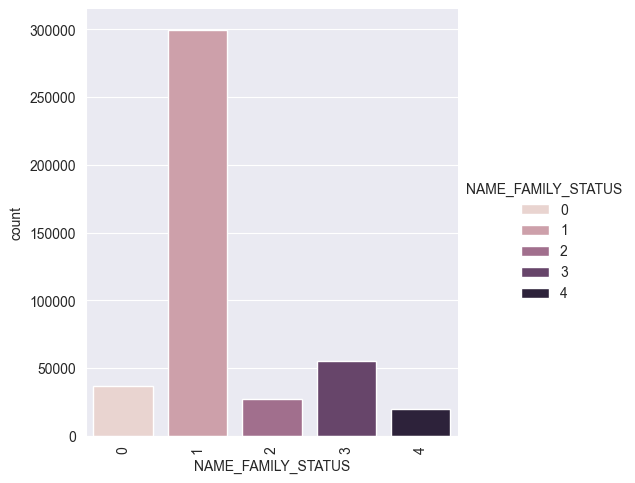

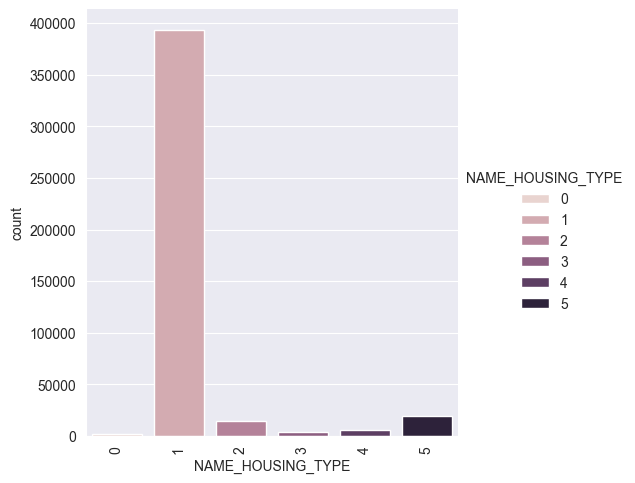

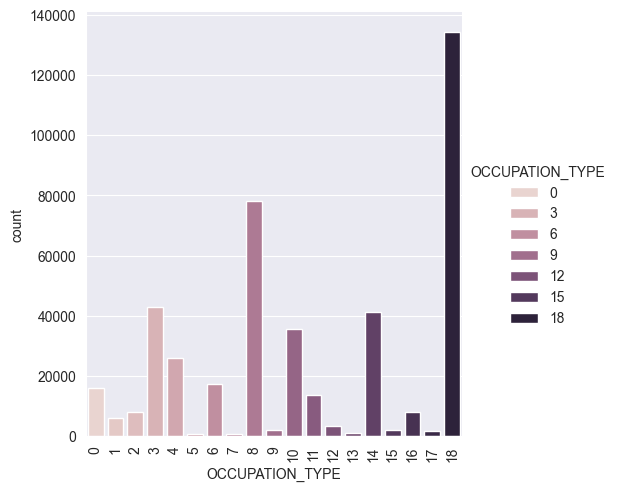

In [130]:
sns.catplot(x = "CODE_GENDER", kind = "count", hue = "CODE_GENDER" , data = application)
plt.xticks(rotation = 90)
sns.catplot(x = "NAME_INCOME_TYPE", kind = "count", hue = "NAME_INCOME_TYPE" , data = application)
plt.xticks(rotation = 90)
sns.catplot(x = "NAME_EDUCATION_TYPE", kind = "count", hue = "NAME_EDUCATION_TYPE" , data = application)
plt.xticks(rotation = 90)
sns.catplot(x = "NAME_FAMILY_STATUS", kind = "count", hue = "NAME_FAMILY_STATUS" , data = application)
plt.xticks(rotation = 90)
sns.catplot(x = "NAME_HOUSING_TYPE", kind = "count", hue = "NAME_HOUSING_TYPE" , data = application)
plt.xticks(rotation = 90)
sns.catplot(x = "OCCUPATION_TYPE", kind = "count", hue = "OCCUPATION_TYPE" , data = application)
plt.xticks(rotation = 90)


Using Seaborn to create a heatmap, shows the relationship between each variable and correlation. Helps address if two variables are key components that regress when in contact with another. Also helps to determine which variable might have a strong correlation, thus determining which variable to address for further research on their impact for loan approvals. 

<Axes: >

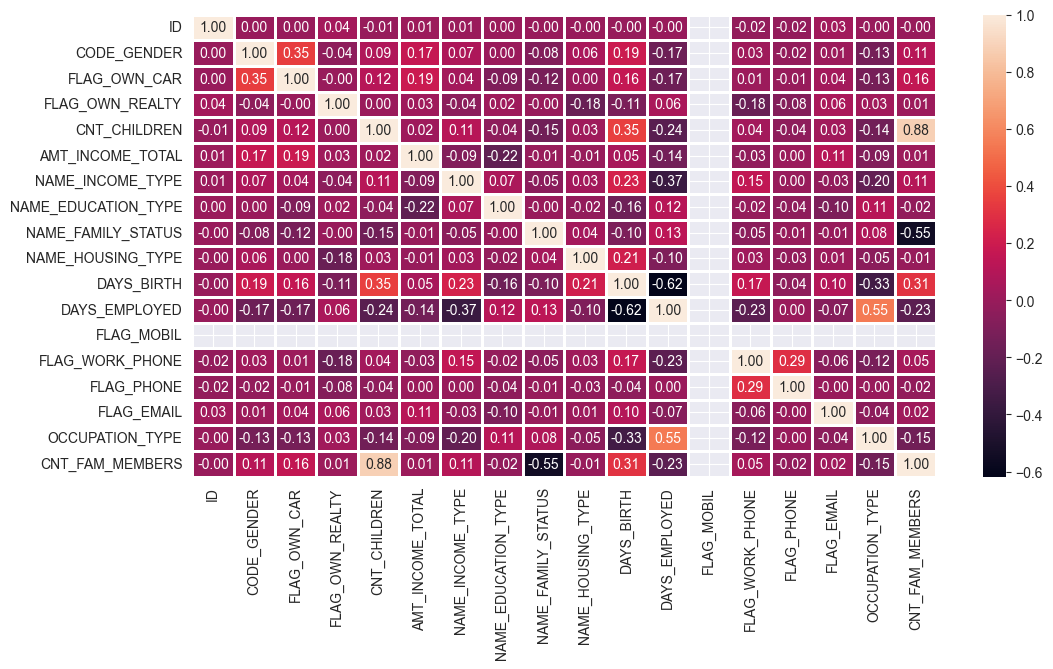

In [99]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder() 

application['FLAG_OWN_CAR'] = label_encoder.fit_transform(application['FLAG_OWN_CAR']) 
application['FLAG_OWN_CAR'].unique()

application['FLAG_OWN_REALTY'] = label_encoder.fit_transform(application['FLAG_OWN_REALTY']) 
application['FLAG_OWN_REALTY'].unique()

application['NAME_INCOME_TYPE'] = label_encoder.fit_transform(application['NAME_INCOME_TYPE']) 
application['NAME_INCOME_TYPE'].unique()

application['CODE_GENDER'] = label_encoder.fit_transform(application['CODE_GENDER']) 
application['CODE_GENDER'].unique()

application['NAME_EDUCATION_TYPE'] = label_encoder.fit_transform(application['NAME_EDUCATION_TYPE']) 
application['NAME_EDUCATION_TYPE'].unique()

application['NAME_FAMILY_STATUS'] = label_encoder.fit_transform(application['NAME_FAMILY_STATUS']) 
application['NAME_FAMILY_STATUS'].unique()

application['NAME_HOUSING_TYPE'] = label_encoder.fit_transform(application['NAME_HOUSING_TYPE']) 
application['NAME_HOUSING_TYPE'].unique()

application['OCCUPATION_TYPE'] = label_encoder.fit_transform(application['OCCUPATION_TYPE']) 
application['OCCUPATION_TYPE'].unique()


plt.figure(figsize=(12,6)) 
  
sns.heatmap(application.corr(),fmt = '.2f', linewidths = 2, annot = True)

2. Check for missing values and clean the data.
using Label encoder to transition categorical variables into numerical variables. Then performing cleansing in the dataset to distinguish if there are any null values in the dataset.

In [100]:
application.isna().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

3. Check for outliers and decide if and how to process them.

Cleaning the dataset, by reviewing the boxplot and scatterplot of income amount in the dataset, we are able to determine that there are outliers within the dataset. Using the IQR method to remove the outliers and allow us to create a more accurate solution. 

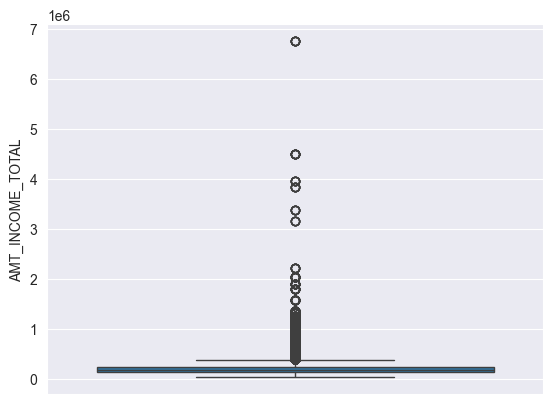

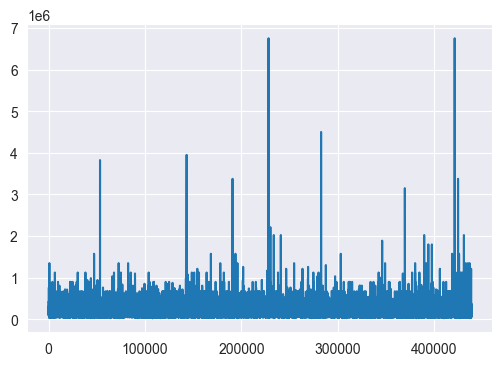

C:\Users\CHEELACHONE\AppData\Local\Temp\ipykernel_3296\2745831585.py:12: DeprecationWarning: Please use `iqr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  IQR = application.apply(stats.iqr)


(127726, 18)

In [131]:
from scipy.stats import stats

sns.boxplot(application['AMT_INCOME_TOTAL'])

plt.subplots(figsize=(6, 4))
plt.plot(application['AMT_INCOME_TOTAL'])
plt.show()

#find Q1, Q3, and interquartile range for each column
Q1 = application.quantile(q=.25)
Q3 = application.quantile(q=.75)
IQR = application.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
cleanApplication = application[~((application < (Q1-1.5*IQR)) | (application > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
cleanApplication.shape



Creating a testing and training dataset to help predict if the probability of our training set is accurate or not. Testings sets are useful as you are able to try new methods with the dataset without fear of messing up the overall dataset. It is also useful to discover if new implementations are useful or not. Training sets are useful to plot against the testing set, if the datasets are relatively close then the testing set is accurate in predictions. 

In [136]:
from sklearn.model_selection import train_test_split 

X = cleanApplication[['OCCUPATION_TYPE']]
y = cleanApplication['NAME_EDUCATION_TYPE'] 
  
# using the train test split function 
X_train, X_test, y_train, y_test = train_test_split(X,y , 
                                   random_state=104,  
                                   test_size=0.3,  
                                   shuffle=True) 
  
# printing out train and test sets 
  
print('X_train : ') 
print(X_train.head()) 
print('') 
print('X_test : ') 
print(X_test.head()) 
print('') 
print('y_train : ') 
print(y_train.head()) 
print('') 
print('y_test : ') 
print(y_test.head())



X_train : 
        OCCUPATION_TYPE
25426                18
72173                 4
327831               18
48692                 2
220255               15

X_test : 
        OCCUPATION_TYPE
289849               10
23111                 2
192010                8
34633                 8
1186                 10

y_train : 
25426     1
72173     4
327831    4
48692     4
220255    4
Name: NAME_EDUCATION_TYPE, dtype: int32

y_test : 
289849    4
23111     4
192010    4
34633     4
1186      4
Name: NAME_EDUCATION_TYPE, dtype: int32


1. Define the formula for the glm().
2. Run the model.
3. Interpret the results, referring to the p-values.

Using a generalized linear model to establish how each categorical variable contributes to the relationship of loan approvals. The model is using education and income to satisfy the objective on whether education and amount of income play a role in determining the approval rate of a loan. From the GLM we are able to distinguish that the p-value is 0, meaning that there is no relation on wether the variables play a role in the loan application. Other factors to look at might be coefficents which establish that within the category each additional data associated with it is an increase of x amount. 

In [103]:
import statsmodels.formula.api as smf
model = smf.glm(formula = "NAME_EDUCATION_TYPE ~ NAME_INCOME_TYPE + NAME_FAMILY_STATUS + NAME_HOUSING_TYPE + OCCUPATION_TYPE", 
                data = cleanApplication, 
                family = sm.families.Binomial())

result = model.fit()
print(result.summary())
predictions = result.predict()

C:\Users\CHEELACHONE\PycharmProjects\pythonProject\venv\lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


                  Generalized Linear Model Regression Results                  
Dep. Variable:     NAME_EDUCATION_TYPE   No. Observations:               127726
Model:                             GLM   Df Residuals:                   127723
Model Family:                 Binomial   Df Model:                            2
Link Function:                   Logit   Scale:                          1.0000
Method:                           IRLS   Log-Likelihood:                   -inf
Date:                 Wed, 20 Dec 2023   Deviance:                   2.0705e+07
Time:                         20:39:47   Pearson chi2:                 3.65e+21
No. Iterations:                      4   Pseudo R-squ. (CS):                nan
Covariance Type:             nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           6.779e

C:\Users\CHEELACHONE\PycharmProjects\pythonProject\venv\lib\site-packages\statsmodels\genmod\families\family.py:1056: RuntimeWarning: invalid value encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
C:\Users\CHEELACHONE\PycharmProjects\pythonProject\venv\lib\site-packages\statsmodels\genmod\families\family.py:1057: RuntimeWarning: invalid value encountered in log
  n * np.log(1 - mu + 1e-20)) * var_weights


1. Compare the predicted versus actual values.
2. Search for any predictions that differ significantly from the actual values.

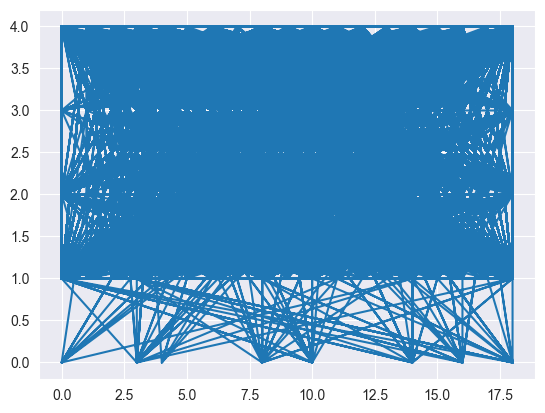

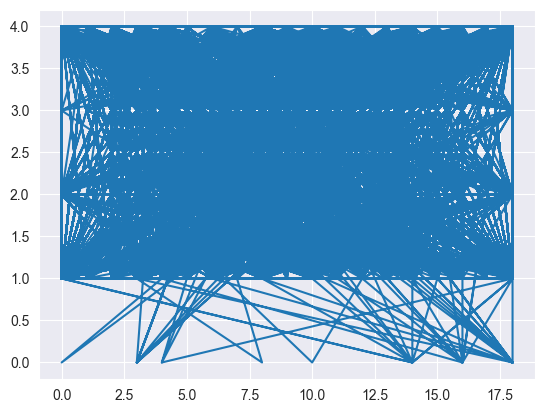

In [110]:
plt.plot(X_train, y_train)
plt.show()

plt.plot(X_test, y_test)
plt.show()

Produce a Gain and Lift chart and use it to describe the performance of the model.

In [139]:
from sklearn.naive_bayes import GaussianNB
import scikitplot as skplt

nb = GaussianNB()
nb.fit(X_train, y_train)
predictedProbas = nb.predict_proba(X_test)

skplt.metrics.plot_lift_curve(y_train,predictedProbas)



ModuleNotFoundError: No module named 'scikitplot'

Measure the Variation Inflation Factor (VIF) to test for multicollinearity. If changes are necessary to the model based in VIF, state and implement them. Within the VIF results it can be established that there is no multicollinearity as all variables have a score of 1 or less. Within the VIF framework it said that if a variable has a VIF score of 5-10 it can be established as having multicollinearity. 

In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import pandas as pd

x = cleanApplication[['NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']]

vif_data = pd.DataFrame() 
vif_data["feature"] = x.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x.values, i) 
                          for i in range(len(x.columns))] 
  
print(vif_data)

               feature       VIF
0  NAME_EDUCATION_TYPE  1.014856
1     NAME_INCOME_TYPE  1.012510
2   NAME_FAMILY_STATUS  0.000000
3    NAME_HOUSING_TYPE  0.000000
4      OCCUPATION_TYPE  1.002436


C:\Users\CHEELACHONE\PycharmProjects\pythonProject\venv\lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Using logistic regression to determine if the tests are accurate in relation to another. The score of 70% indicates that the training and testing set are not similar. This can in return mean that neither education nor income play a crucial role in determining the approval of loans. 

In [140]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

print(accuracy_score(y_test, model.predict(X_test)))




0.6975572837830785


Resources:
Seaborn. (2023). Plotting with categorical data. Seaborn. https://seaborn.pydata.org/archive/0.11/tutorial/categorical.html

Scikit-learn. (2023). sklearn.linear_model.LogisticRegression. Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Nanlani., A. (2019). Understanding Logistic Regression in Python Tutorial. DataCamp. https://www.datacamp.com/tutorial/understanding-logistic-regression-python

GeeksForGeeks. (2023). Understanding Gain Chart and Lift Chart. GeeksForGeeks. https://www.geeksforgeeks.org/understanding-gain-chart-and-lift-chart/
